### Задание

Проверить принадлежность к пуассоновскому, геометрическому распределению случайной величины – количества подвижных единиц грузового поезда в сходе с рельсов минус единица – на основе критерия хи- квадрат. Уровень надежности принять равным 0.95, 0.99.

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel("WO.xlsx")
df['y'] = df['dcar'] - 1
df.head()

,date,length,commonlength,maxder,dcar,speed,weight,load,curve,profile,type,y
0,2013-01-03,68,70,61,1,6,4875,0.705669,0.005000,0.0000,2,0
1,2013-01-03,43,45,2,1,30,3955,0.999663,0.005000,NaN,2,0
2,2013-01-10,70,72,65,4,10,1658,0.009938,NaN,NaN,2,3
3,2013-01-10,56,58,44,10,29,2651,0.352743,0.003333,-0.0164,2,9
4,2013-01-12,68,71,23,1,5,2522,0.204177,0.003333,NaN,2,0


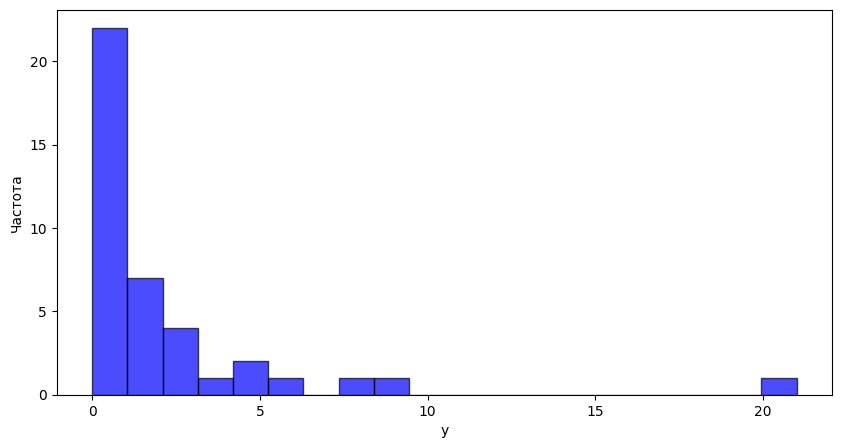

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['y'], bins=20, color='blue', edgecolor='black', alpha=0.7)
ax.set_xlabel('y')
ax.set_ylabel('Частота')
plt.show()

### Распределение Пуассона

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

где:
- $P(X = k)$ — вероятность того, что случайная величина $X$ примет значение $k$,
- $\lambda$ — среднее число событий в фиксированном интервале,
- $k$ — количество событий,
- $e$ — основание натурального логарифма (приблизительно равно 2.71828),
- $k!$ — факториал числа $k$

Вывдвежение гипотез

$H_0: X \sim \Pi(\theta)$

$H_1: X \nsim \Pi(\theta)$

### ММП

$$ L(x_1, x_2, ..., x_n, \theta) = \prod^n_{k=1} P(x = x_k, \theta) = \prod^n_{k=1}  \frac{\theta^{x_k} e^{-\theta}}{x_k!}$$
$$ \prod^n_{k=1}  \frac{\theta^{x_k} e^{-\theta}}{x_k!} = \prod^n_{k=1} \theta^{x_k} \cdot \prod^n_{k=1} e^{-\theta} \cdot \prod^n_{k=1} \frac{1}{x_k!}$$

$$ \overline L (x_1, x_2, ..., x_n, \theta) = \theta^{\sum_{k=1}^n x_k} \cdot e^{-n\theta} \cdot \prod^n_{k=1} \frac{1}{x_k!} $$

$$ log \overline L (x_1, x_2, ..., x_n, \theta) = \sum_{k=1}^n x_k \cdot log \theta - n\theta + log (\prod^n_{k=1} \frac{1}{x_k!})$$

$$\frac{d(log(\overline L))}{d\theta} = \frac{\sum_{k=1}^n x_k}{\theta} - n = 0 $$

$$ \theta^{*} = \frac{\sum_{k=1}^n x_k}{n}$$

In [5]:
theta = df['y'].mean() 

In [6]:
x = df['y'].value_counts().reset_index()
unique_values,  observed_freq = [i for i in range(x['y'].max()+1)], [0 if x[x['y'] == i].empty else x[x['y'] == i]['count'].iloc[0] for i in range(x['y'].max()+1)]
unique_values,  observed_freq = np.array(unique_values),  np.array(observed_freq)

In [7]:
poisson_probs = stats.poisson.pmf(unique_values, theta)
P_pois = 1 - np.sum(poisson_probs)

In [8]:
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [9]:
sum(poisson_probs)

0.9999999999999928

In [10]:
# Статистика критерия для пуассоновского распределения
n = len(df)
max=len(unique_values)
Z_pois = n * P_pois
for i in range(max):
    Z_pois += ((observed_freq[i] - n * poisson_probs[i]) ** 2 )/(n * poisson_probs[i])
print("Z_pois:", Z_pois)

Z_pois: 395999325195.7964


In [11]:
Xi_0_95 = stats.chi2.ppf(0.95, max)
print(f"Xi^2({0.95}, {max}) = {Xi_0_95}")
Xi_0_99 = stats.chi2.ppf(0.99, max)
print(f"Xi^2({0.99}, {max}) = {Xi_0_99}")

Xi^2(0.95, 22) = 33.92443847144381
Xi^2(0.99, 22) = 40.289360437593864


In [12]:
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

Значение найденной статистики больше значения функции Хи-квадрат при любом из заданных уровней надежности, оно попадает в критическую область, гипотеза о принадлежности случайной величины к пуассоновскому распределению не принимается.

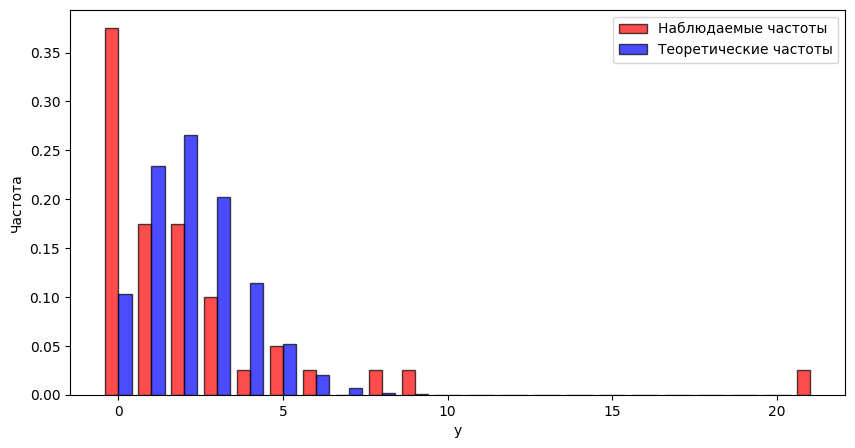

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(unique_values - 0.2, height=observed_freq/len(df), color='red', edgecolor='black', width=0.4, alpha=0.7)
ax.bar([i + 0.2 for i in range(unique_values.max())], height=[stats.poisson.pmf(i, theta) for i in range(unique_values.max())], color='blue', edgecolor='black', width=0.4, alpha=0.7)
ax.set_xlabel('y')
ax.set_ylabel('Частота')
ax.legend(['Наблюдаемые частоты', 'Теоретические частоты'])
plt.show()

### Геометрическое распределение

$$
P(X = k) = (1 - p)^{k} p
$$

где:
- $P(X = k)$ — вероятность того, что случайная величина $X$ примет значение $k$,
- $p$ — вероятность успеха в каждом испытании,
- $k$ — количество испытаний до первого успеха (включительно).

Гипотезы
$$ H_0: X \sim \text{Geom}(p) $$

$$ H_1: X \nsim \text{Geom}(p) $$

ММП

$$ L(x_1, x_2, ..., x_n, p) = \prod_{k=1}^n P(X = x_k, p) = \prod_{k=1}^n (1 - p)^{x_k} p $$


$$ L(x_1, x_2, ..., x_n, p) = p^n \cdot (1 - p)^{\sum_{k=1}^n (x_k)} $$


$$ \log L(x_1, x_2, ..., x_n, p) = n \log p + \left( \sum_{k=1}^n (x_k) \right) \log (1 - p) $$


$$ \frac{d(\log L)}{dp} = \frac{n}{p} - \frac{\sum_{k=1}^n (x_k)}{1 - p} = 0 $$

Решим уравнение относительно ( p ):

$$ \frac{n}{p} = \frac{\sum_{k=1}^n (x_k)}{1 - p} $$

$$ n(1 - p) = p \sum_{k=1}^n (x_k) $$

$$ n - np = p \sum_{k=1}^n (x_k) $$

$$ n = p \left( n + \sum_{k=1}^n (x_k) \right) $$

$$ p = \frac{n}{n + \sum_{k=1}^n (x_k)} $$

Таким образом, оценка параметра ( p ) методом максимального правдоподобия:

$$ p^{*} = \frac{n}{n + \sum_{k=1}^n (x_k)} $$

$$ p^{*} = \frac{1}{1 + \frac{\sum_{k=1}^n (x_k)}{n}} $$

In [14]:
p = 1 / (df['y'].mean() + 1)
p

0.3053435114503817

In [15]:
geom_probs = stats.geom.pmf(unique_values+1, p)
P_geom = 1 - np.sum(geom_probs)

In [16]:
Z_geom = n * P_geom
for i in range(max):
    Z_geom += ((observed_freq[i] - n * geom_probs[i]) ** 2 )/(n * geom_probs[i])
print("Z_geom:", Z_geom)

Z_geom: 175.38669932486246


In [17]:
print(f"Xi^2({0.95}, {max}) = {Xi_0_95}")
print(f"Xi^2({0.99}, {max}) = {Xi_0_99}")

Xi^2(0.95, 22) = 33.92443847144381
Xi^2(0.99, 22) = 40.289360437593864


Значение найденной статистики больше значения функции Хи-квадрат при любом из заданных уровней надежности, оно попадает в критическую область, гипотеза о принадлежности случайной величины к геометрическому распределению не принимается.

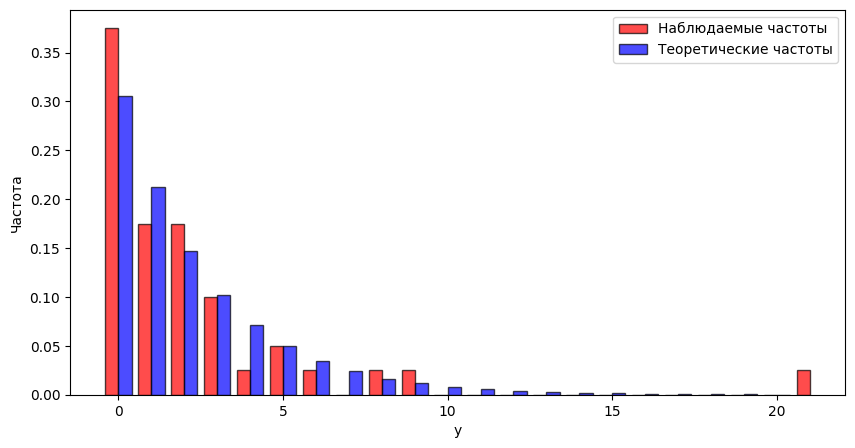

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(unique_values - 0.2, height=observed_freq/len(df), color='red', edgecolor='black', width=0.4, alpha=0.7)
ax.bar([i + 0.2 for i in range(unique_values.max())], height=[stats.geom.pmf(i+1, p) for i in range(unique_values.max())], color='blue', edgecolor='black', width=0.4, alpha=0.7)
ax.set_xlabel('y')
ax.set_ylabel('Частота')
ax.legend(['Наблюдаемые частоты', 'Теоретические частоты'])
plt.show()

Предполагаем, что полученный результат связан с выбросом в исходных данных. Исключим одно наблюдение с максимальным значением

In [19]:
new_y = np.array([a for a in df['y'] if a < df['y'].max()])

theta = new_y.mean() 

x = df[df['y'] != df['y'].max()].value_counts().reset_index()
unique_values,  observed_freq = [i for i in range(x['y'].max()+1)], [0 if x[x['y'] == i].empty else x[x['y'] == i]['count'].iloc[0] for i in range(x['y'].max()+1)]
unique_values,  observed_freq = np.array(unique_values),  np.array(observed_freq)
poisson_probs = stats.poisson.pmf(unique_values, theta)
P_pois = 1 - np.sum(poisson_probs)

n = len(new_y)
max=len(unique_values)
Z_pois = n * P_pois
for i in range(max):
    Z_pois += ((observed_freq[i] - n * poisson_probs[i]) ** 2 )/(n * poisson_probs[i])
print("Z_pois:", Z_pois)

Z_pois: 319.1642008103951


In [20]:
x['y'].max()

9

In [21]:
Xi_0_95 = stats.chi2.ppf(0.95, max)
print(f"Xi^2({0.95}, {max}) = {Xi_0_95}")
Xi_0_99 = stats.chi2.ppf(0.99, max)
print(f"Xi^2({0.99}, {max}) = {Xi_0_99}")

Xi^2(0.95, 10) = 18.307038053275146
Xi^2(0.99, 10) = 23.209251158954356


Значение найденной статистики больше значения функции Хи-квадрат при любом из заданных уровней надежности, оно попадает в критическую область, гипотеза о принадлежности случайной величины к пуассоновскому распределению не принимается.

In [22]:
p = 1 / (new_y.mean() + 1)

geom_probs = stats.geom.pmf(unique_values+1, p)
P_geom = 1 - np.sum(geom_probs)

Z_geom = n * P_geom
for i in range(max):
    Z_geom += ((observed_freq[i] - n * geom_probs[i]) ** 2 )/(n * geom_probs[i])
print("Z_geom:", Z_geom)

print(f"Xi^2({0.95}, {max}) = {Xi_0_95}")
print(f"Xi^2({0.99}, {max}) = {Xi_0_99}")

Z_geom: 33.484620584270345
Xi^2(0.95, 10) = 18.307038053275146
Xi^2(0.99, 10) = 23.209251158954356


Значение найденной статистики больше значения функции Хи-квадрат при любом из заданных уровней надежности, оно попадает в критическую область, гипотеза о принадлежности случайной величины к геометрическому распределению не принимается.

### Заключение

В ходе выполнения работы были проведены статистические проверки гипотез о принадлежности случайной величины $\tilde{X}=X-1$ (где $X$ --  количество подвижных единиц грузового поезда в сходе с рельсов) к пуассоновскому и геометрическому распределениям. Использовался критерий согласия $\chi^2$  с уровнями надежности $0.95$ и $0.99$. Исходные данные не соответствуют ни пуассоновскому, ни геометрическому распределению даже после исключения аномальных наблюдений.